 # RECOMMENDER SYSTEM FOR REDDIT 

Objective is to design a subreddit recommender for Reddit

## Loading the dataset 

In [1]:
# Import necessary packages

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('reddit_data.csv')
df.head()

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09
2,kabanossi,vmware,1.482748e+09
3,kabanossi,carporn,1.482748e+09
4,kabanossi,DIY,1.482747e+09


## Data Exploration

In [3]:
# Looking at shape and info about dataset

print(df.shape)
print(df.info())

(14000000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000000 entries, 0 to 13999999
Data columns (total 3 columns):
username     object
subreddit    object
utc          float64
dtypes: float64(1), object(2)
memory usage: 320.4+ MB
None


In [4]:
# Checking for null values in dataset

print(df.username.isnull().sum())
print(df.subreddit.isnull().sum())
print(df.utc.isnull().sum())

0
0
0


In [5]:
# Checking unique subreddits and users

print(len(df.username.unique()))
print(len(df.subreddit.unique()))

22610
34967


# Data Visualization

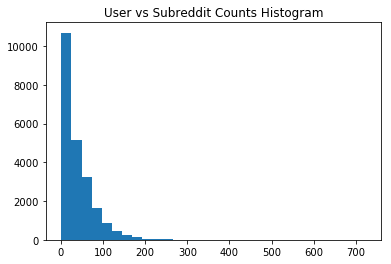

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
user_subreddit = df.groupby(['username'])['subreddit'].nunique()
user_subreddit
plt.hist(user_subreddit.values, bins=30)
plt.title("User vs Subreddit Counts Histogram")
plt.show()

# Feature Engineering

In [7]:
# Making a dataframe by grouping dataset by username and value counts of each unique subreddit

subreddits_per_user = df.groupby(['username'])['subreddit'].value_counts()

In [8]:
# Making a new dataframe 

subreddits_per_user_df = pd.DataFrame(subreddits_per_user)
subreddits_per_user_df.rename(columns = {'subreddit':'count_per_subreddit_of_user'}, inplace=True)
print(subreddits_per_user_df.head())
print(subreddits_per_user_df.info())

                          count_per_subreddit_of_user
username    subreddit                                
--ANUSTART- Testosterone                          117
            Monitors                               23
            buildmeapc                             23
            sanantonio                             22
            AskReddit                              14
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 892462 entries, (--ANUSTART-, Testosterone) to (zzy_, news)
Data columns (total 1 columns):
count_per_subreddit_of_user    892462 non-null int64
dtypes: int64(1)
memory usage: 12.4+ MB
None


In [9]:
# Reset index

new_1 = subreddits_per_user_df.reset_index(level = 1, drop = False)
new_1.head()

,subreddit,count_per_subreddit_of_user
username,,
--ANUSTART-,Testosterone,117
--ANUSTART-,Monitors,23
--ANUSTART-,buildmeapc,23
--ANUSTART-,sanantonio,22
--ANUSTART-,AskReddit,14


# Extrapolatory Data Analysis

USER WITH MOST SUBREDDITS

In [10]:
# Users with most subreddits

ser = pd.DataFrame(new_1.groupby(['username'])['count_per_subreddit_of_user'].sum())
ser.sort_values(by = 'count_per_subreddit_of_user', ascending=False).head()

,count_per_subreddit_of_user
username,
eastshores,1000
LiquidAether,1000
Lindsw,1000
LingLing_NorthKorea,1000
Liniis,1000


TOP 10 SUBREDDITS

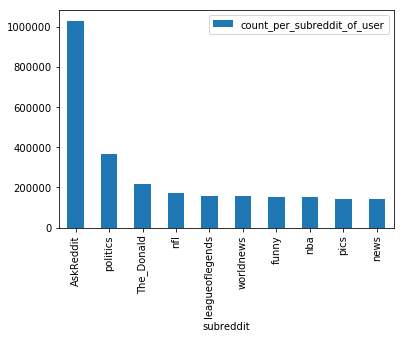

In [11]:
# Top 10 subreddits

res = pd.DataFrame(new_1.groupby('subreddit')['count_per_subreddit_of_user'].sum())
res_1 = res.sort_values(by='count_per_subreddit_of_user', ascending=False)[0:10]
res_1.plot.bar()
plt.show()

## Dataset construction

In [12]:
# Reset index

new_2 = new_1.reset_index()
new_2.head()
new_2.describe()

,count_per_subreddit_of_user
count,892462.000000
mean,15.686942
std,63.527178
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,1000.000000


In [13]:
new_2.count_per_subreddit_of_user = new_2.count_per_subreddit_of_user.astype('uint8')
new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892462 entries, 0 to 892461
Data columns (total 3 columns):
username                       892462 non-null object
subreddit                      892462 non-null object
count_per_subreddit_of_user    892462 non-null uint8
dtypes: object(2), uint8(1)
memory usage: 14.5+ MB


In [14]:
new_2.head()

,username,subreddit,count_per_subreddit_of_user
0,--ANUSTART-,Testosterone,117
1,--ANUSTART-,Monitors,23
2,--ANUSTART-,buildmeapc,23
3,--ANUSTART-,sanantonio,22
4,--ANUSTART-,AskReddit,14


In [15]:
new_2.shape

(892462, 3)

In [16]:
new_2.count_per_subreddit_of_user.describe()

count    892462.000000
mean         11.013345
std          27.549570
min           0.000000
25%           1.000000
50%           2.000000
75%           7.000000
max         255.000000
Name: count_per_subreddit_of_user, dtype: float64

In [17]:
# Masking to remove outliers

from scipy.stats import iqr
outlier_range = 1.5*(iqr(new_2.count_per_subreddit_of_user.values))
print(outlier_range)
tran = new_2[(new_2['count_per_subreddit_of_user'] > 10) & (new_2['count_per_subreddit_of_user'] < 85)]

9.0


In [18]:
tran.head()

,username,subreddit,count_per_subreddit_of_user
1,--ANUSTART-,Monitors,23
2,--ANUSTART-,buildmeapc,23
3,--ANUSTART-,sanantonio,22
4,--ANUSTART-,AskReddit,14
5,--ANUSTART-,Watches,11


In [19]:
tran.shape

(145553, 3)

In [20]:
# Splitting into train and test

from sklearn.model_selection import train_test_split
train, test = train_test_split(tran, train_size = 0.7)

/home/bijit23/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
train.shape

(101887, 3)

In [22]:
test.shape

(43666, 3)

In [23]:
train.head()

,username,subreddit,count_per_subreddit_of_user
343084,RastaTeddyBear,postmates,11
351812,Rhumald,AdviceAnimals,32
735239,nikolaibk,trees,18
857719,typicalredditor8,KenM,13
763386,poppyseedtoast,AskWomen,24


## Creating pivot tables to generate sparse matrix 

In [24]:
pivot_train = train.pivot(index='username', columns='subreddit')

In [25]:
pivot_train.head()

count_per_subreddit_of_user                      \
subreddit                100DayComicChallenge 100yearsago 10Sound   
username                                                            
--ANUSTART-                               NaN         NaN     NaN   
--Sko--                                   NaN         NaN     NaN   
--UNKN0WN--                               NaN         NaN     NaN   
--harley--quinn--                         NaN         NaN     NaN   
-AragornElessar-                          NaN         NaN     NaN   

                                                                             \
subreddit         10cloverfieldlane 1200isplenty 1200isplentyketo 12ozmouse   
username                                                                      
--ANUSTART-                     NaN          NaN              NaN       NaN   
--Sko--                         NaN          NaN              NaN       NaN   
--UNKN0WN--                     NaN          NaN              NaN       NaN   
--harley--quinn--               NaN          NaN              NaN       NaN   
-AragornElessar-                NaN          NaN              NaN       NaN   

                                       ...                                 \
subreddit         1911 1P_LSD 1PugLife ... zerocarb zeronet zfs zombicide   
username                               ...                                  
--ANUSTART-        NaN    NaN      NaN ...      NaN     NaN NaN       NaN   
--Sko--            NaN    NaN      NaN ...      NaN     NaN NaN       NaN   
--UNKN0WN--        NaN    NaN      NaN ...      NaN     NaN NaN       NaN   
--harley--quinn--  NaN    NaN      NaN ...      NaN     NaN NaN       NaN   
-AragornElessar-   NaN    NaN      NaN ...      NaN     NaN NaN       NaN   

                                                                   
subreddit         zombies zoophilia zootopia zurich zyramains zzt  
username                                                           
--ANUSTART-           NaN       NaN      NaN    NaN       NaN NaN  
--Sko--               NaN       NaN      NaN    NaN       NaN NaN  
--UNKN0WN--           NaN       NaN      NaN    NaN       NaN NaN  
--harley--quinn--     NaN       NaN      NaN    NaN       NaN NaN  
-AragornElessar-      NaN       NaN      NaN    NaN       NaN NaN  

[5 rows x 8270 columns]

In [26]:
pivot_test = test.pivot(index='username', columns='subreddit')

In [27]:
pivot_test.head()

count_per_subreddit_of_user                           \
subreddit                         1200isplenty 1200isplentyketo 12thMan   
username                                                                  
--ANUSTART-                                NaN              NaN     NaN   
--UNKN0WN--                                NaN              NaN     NaN   
--harley--quinn--                          NaN              NaN     NaN   
-AragornElessar-                           NaN              NaN     NaN   
-BipolarPolarBear-                         NaN              NaN     NaN   

                                                                            \
subreddit          1P_LSD 2007scape 2016Elections 2016splits 2KOA 2b2t 2cb   
username                                                                     
--ANUSTART-           NaN       NaN           NaN        NaN  NaN  NaN NaN   
--UNKN0WN--           NaN       NaN           NaN        NaN  NaN  NaN NaN   
--harley--quinn--     NaN       NaN           NaN        NaN  NaN  NaN NaN   
-AragornElessar-      NaN       NaN           NaN        NaN  NaN  NaN NaN   
-BipolarPolarBear-    NaN       NaN           NaN        NaN  NaN  NaN NaN   

                   ...                                                  \
subreddit          ...  zatchbell zec zedmains zelda zen zeronet zizek   
username           ...                                                   
--ANUSTART-        ...        NaN NaN      NaN   NaN NaN     NaN   NaN   
--UNKN0WN--        ...        NaN NaN      NaN   NaN NaN     NaN   NaN   
--harley--quinn--  ...        NaN NaN      NaN   NaN NaN     NaN   NaN   
-AragornElessar-   ...        NaN NaN      NaN   NaN NaN     NaN   NaN   
-BipolarPolarBear- ...        NaN NaN      NaN   NaN NaN     NaN   NaN   

                                            
subreddit          zootopia zyramains zyzz  
username                                    
--ANUSTART-             NaN       NaN  NaN  
--UNKN0WN--             NaN       NaN  NaN  
--harley--quinn--       NaN       NaN  NaN  
-AragornElessar-        NaN       NaN  NaN  
-BipolarPolarBear-      NaN       NaN  NaN  

[5 rows x 5685 columns]

In [28]:
pivot_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18169 entries, --ANUSTART- to zzy_
Columns: 8270 entries, (count_per_subreddit_of_user, 100DayComicChallenge) to (count_per_subreddit_of_user, zzt)
dtypes: float64(8270)
memory usage: 1.1+ GB


## Taking a sample from training data

In [29]:
sample = pivot_train.sample(frac=0.1)

In [30]:
sample.head()

count_per_subreddit_of_user                      \
subreddit              100DayComicChallenge 100yearsago 10Sound   
username                                                          
wordsoundpower                          NaN         NaN     NaN   
Grunt08                                 NaN         NaN     NaN   
stormtrooper412                         NaN         NaN     NaN   
shabba_rei                              NaN         NaN     NaN   
devinesigns                             NaN         NaN     NaN   

                                                                           \
subreddit       10cloverfieldlane 1200isplenty 1200isplentyketo 12ozmouse   
username                                                                    
wordsoundpower                NaN          NaN              NaN       NaN   
Grunt08                       NaN          NaN              NaN       NaN   
stormtrooper412               NaN          NaN              NaN       NaN   
shabba_rei                    NaN          NaN              NaN       NaN   
devinesigns                   NaN          NaN              NaN       NaN   

                                     ...                                 \
subreddit       1911 1P_LSD 1PugLife ... zerocarb zeronet zfs zombicide   
username                             ...                                  
wordsoundpower   NaN    NaN      NaN ...      NaN     NaN NaN       NaN   
Grunt08          NaN    NaN      NaN ...      NaN     NaN NaN       NaN   
stormtrooper412  NaN    NaN      NaN ...      NaN     NaN NaN       NaN   
shabba_rei       NaN    NaN      NaN ...      NaN     NaN NaN       NaN   
devinesigns      NaN    NaN      NaN ...      NaN     NaN NaN       NaN   

                                                                 
subreddit       zombies zoophilia zootopia zurich zyramains zzt  
username                                                         
wordsoundpower      NaN       NaN      NaN    NaN       NaN NaN  
Grunt08             NaN       NaN      NaN    NaN       NaN NaN  
stormtrooper412     NaN       NaN      NaN    NaN       NaN NaN  
shabba_rei          NaN       NaN      NaN    NaN       NaN NaN  
devinesigns         NaN       NaN      NaN    NaN       NaN NaN  

[5 rows x 8270 columns]

In [31]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1817 entries, wordsoundpower to Kirk781
Columns: 8270 entries, (count_per_subreddit_of_user, 100DayComicChallenge) to (count_per_subreddit_of_user, zzt)
dtypes: float64(8270)
memory usage: 114.7+ MB


In [32]:
np.nansum(sample.values)

282252.0

In [33]:
sample.fillna(0, inplace=True)

In [34]:
sample.head()

count_per_subreddit_of_user                      \
subreddit              100DayComicChallenge 100yearsago 10Sound   
username                                                          
wordsoundpower                          0.0         0.0     0.0   
Grunt08                                 0.0         0.0     0.0   
stormtrooper412                         0.0         0.0     0.0   
shabba_rei                              0.0         0.0     0.0   
devinesigns                             0.0         0.0     0.0   

                                                                           \
subreddit       10cloverfieldlane 1200isplenty 1200isplentyketo 12ozmouse   
username                                                                    
wordsoundpower                0.0          0.0              0.0       0.0   
Grunt08                       0.0          0.0              0.0       0.0   
stormtrooper412               0.0          0.0              0.0       0.0   
shabba_rei                    0.0          0.0              0.0       0.0   
devinesigns                   0.0          0.0              0.0       0.0   

                                     ...                                   \
subreddit       1911 1P_LSD 1PugLife ...  zerocarb zeronet  zfs zombicide   
username                             ...                                    
wordsoundpower   0.0    0.0      0.0 ...       0.0     0.0  0.0       0.0   
Grunt08          0.0    0.0      0.0 ...       0.0     0.0  0.0       0.0   
stormtrooper412  0.0    0.0      0.0 ...       0.0     0.0  0.0       0.0   
shabba_rei       0.0    0.0      0.0 ...       0.0     0.0  0.0       0.0   
devinesigns      0.0    0.0      0.0 ...       0.0     0.0  0.0       0.0   

                                                                  
subreddit       zombies zoophilia zootopia zurich zyramains  zzt  
username                                                          
wordsoundpower      0.0       0.0      0.0    0.0       0.0  0.0  
Grunt08             0.0       0.0      0.0    0.0       0.0  0.0  
stormtrooper412     0.0       0.0      0.0    0.0       0.0  0.0  
shabba_rei          0.0       0.0      0.0    0.0       0.0  0.0  
devinesigns         0.0       0.0      0.0    0.0       0.0  0.0  

[5 rows x 8270 columns]

# Collaborative Filtering

Why collaborative filtering?

1. It benefits from large user bases.
2. Flexible across domains

Challenges of collaborative filtering

1. Complexity and expense
2. Data sparsity

In [35]:
# Importing packages for calculating similarity between subreddits and users

from sklearn.metrics.pairwise import cosine_similarity

In [36]:
user_item_matrix = sample.values

In [37]:
item_user_matrix = user_item_matrix.T

In [38]:
# Function for building similarity matrix

def build_similarity_matrix(matrix):
    similarity_matrix = cosine_similarity(matrix)
    return(similarity_matrix)

## Building Truncated SVDs for user-user and item-item matrix

In [39]:
# Using Truncated SVD for simplifying calculation

from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=7)

In [40]:
# Generate subreddit-user matrix

item_user_svd_matrix = SVD.fit_transform(item_user_matrix)

In [41]:
item_user_svd_matrix

array([[  1.30995944e-14,  -3.09368185e-13,  -6.88446315e-14, ...,
         -3.57069344e-13,  -3.96417651e-13,  -2.40684156e-13],
       [  9.43690015e-17,  -7.10189602e-15,   2.72527959e-13, ...,
          2.00269144e-13,   1.64543394e-13,   3.81227995e-14],
       [  4.12816452e-19,   1.82979046e-16,   6.57517697e-15, ...,
         -3.64254614e-14,  -3.99228299e-14,  -5.31303689e-14],
       ..., 
       [  0.00000000e+00,  -0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,  -0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,  -0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,  -0.00000000e+00]])

In [42]:
# Generate subreddit-subreddit similarity matrix

item_similarity_matrix = build_similarity_matrix(item_user_svd_matrix)

In [43]:
item_similarity_matrix.shape

(8270, 8270)

In [44]:
# Generate user-subreddit matrix

user_item_svd_matrix = SVD.fit_transform(user_item_matrix)

In [45]:
# Generate user-user similarity matrix

user_similarity_matrix = build_similarity_matrix(user_item_svd_matrix)

In [46]:
user_similarity_matrix

array([[ 1.        ,  0.08803904,  0.64299892, ...,  0.30885733,
         0.36567277,  0.20576426],
       [ 0.08803904,  1.        , -0.18988189, ...,  0.55389324,
         0.06789515,  0.15936934],
       [ 0.64299892, -0.18988189,  1.        , ..., -0.2657722 ,
         0.43085981,  0.22935768],
       ..., 
       [ 0.30885733,  0.55389324, -0.2657722 , ...,  1.        ,
        -0.1462205 ,  0.03807452],
       [ 0.36567277,  0.06789515,  0.43085981, ..., -0.1462205 ,
         1.        ,  0.72548877],
       [ 0.20576426,  0.15936934,  0.22935768, ...,  0.03807452,
         0.72548877,  1.        ]])

In [47]:
item_similarity_matrix

array([[ 1.        , -0.63644014,  0.81030453, ...,  0.        ,
         0.        ,  0.        ],
       [-0.63644014,  1.        , -0.45960243, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81030453, -0.45960243,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
print(item_similarity_matrix.shape)
print(user_similarity_matrix.shape)

(8270, 8270)
(1817, 1817)


In [49]:
# Generate subreddit-subreddit similarity dataframe

item_similarity_df = pd.DataFrame(item_similarity_matrix, columns=sample.columns.levels[1], index=sample.columns.levels[1])

In [50]:
item_similarity_df.head()

subreddit,100DayComicChallenge,100yearsago,10Sound,10cloverfieldlane,1200isplenty,1200isplentyketo,12ozmouse,1911,1P_LSD,1PugLife,...,zerocarb,zeronet,zfs,zombicide,zombies,zoophilia,zootopia,zurich,zyramains,zzt
subreddit,,,,,,,,,,,,,,,,,,,,,
100DayComicChallenge,1.000000,-0.636440,0.810305,-0.470835,-0.240861,0.627446,-0.144082,0.844877,0.052458,-0.378245,...,0.0,-0.452299,0.0,0.0,0.755612,0.0,0.0,0.0,0.0,0.0
100yearsago,-0.636440,1.000000,-0.459602,0.299870,0.058864,-0.301684,0.311708,-0.611516,0.132027,0.239729,...,0.0,0.275180,0.0,0.0,-0.125189,0.0,0.0,0.0,0.0,0.0
10Sound,0.810305,-0.459602,1.000000,-0.584469,0.148925,0.915893,0.193808,0.866984,0.170509,-0.621056,...,0.0,-0.151743,0.0,0.0,0.738709,0.0,0.0,0.0,0.0,0.0
10cloverfieldlane,-0.470835,0.299870,-0.584469,1.000000,-0.130650,-0.491612,-0.410759,-0.392452,-0.431197,0.427067,...,0.0,0.031016,0.0,0.0,-0.156875,0.0,0.0,0.0,0.0,0.0
1200isplenty,-0.240861,0.058864,0.148925,-0.130650,1.000000,0.146778,0.099459,0.097438,-0.108552,-0.076029,...,0.0,0.905524,0.0,0.0,-0.020461,0.0,0.0,0.0,0.0,0.0


## Getting recommendations for a particular subreddit 

In [51]:
def recommend(subreddit, data, topK):
    row = data.loc[subreddit,:].sort_values(ascending=False).index
    return(sorted(row[1:(topK+1)]))

In [52]:
# A user who likes '10Sound will like the following subreddits'

recommended = recommend('10Sound', item_similarity_df, 10)
recommended

['1200isplentyketo',
 '1911',
 '20xxgame',
 'Celiac',
 'EmDrive',
 'QThruster',
 'Turkey',
 'istanbul',
 'melbourne',
 'xmrtrader']

## Getting recommendations for a particular user based on item-item collaborative filtering

In [53]:
# Recommend subreddit to a given user

def recommend_for_user(data1, data2, user, topN):
    row = pd.DataFrame(data1.loc[user,:].sort_values(ascending = False)).T.columns.levels[1][1:(topN+1)].tolist()
    new_l = []
    for col in row:
        recommended_subreddits = recommend(col, data2, topK = topN)
        for sub in recommended_subreddits:
            new_l.append(sub)
    return(new_l)

In [54]:
# Recommend subreddits for the user 'Grunt08'

x_recommended = recommend_for_user(sample, item_similarity_df, 'Grunt08', 4)
x_recommended


['CampHalfBloodRP',
 'Star_wars_Rogue_One',
 'italy',
 'trucksim',
 '1200isplentyketo',
 'EmDrive',
 'QThruster',
 'melbourne',
 'AVexchange',
 'LivestreamFail',
 'YuYuYu',
 'shoujoraisingproject',
 'AskMenOver30',
 'Breadit',
 'composer',
 'confession']

Things left to try-

1. Validating the result
2. Training on the entire dataset
3. Generating counts for each subreddit for every user
4. Parameter tuning
5. Building a user-user collaborative filtering model